# Importação da biblioteca

In [1]:
from pulp import *

# Problema de otimização

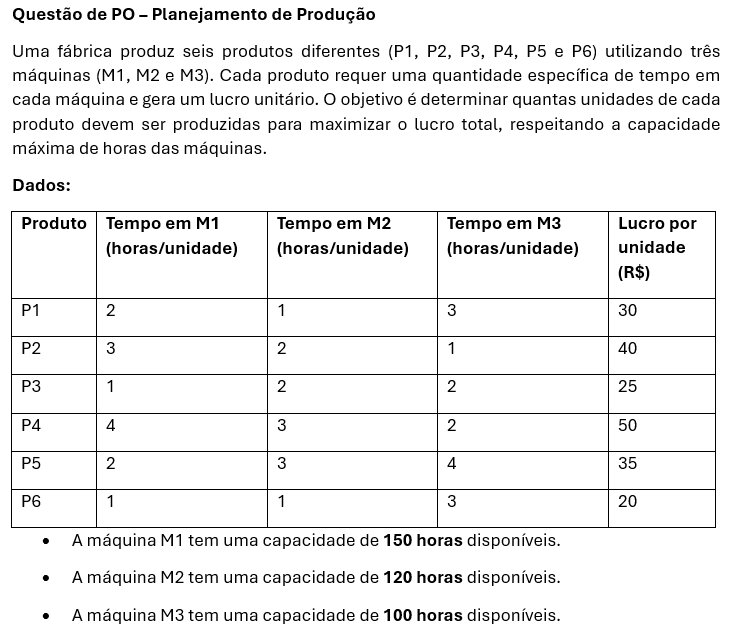

# Resolução do problema

In [3]:
prob = LpProblem('planejamento_producao', LpMaximize)

## Criação das variáveis

In [4]:
p1 = LpVariable('P1', 0, None, LpInteger)
p2 = LpVariable('P2', 0, None, LpInteger)
p3 = LpVariable('P3', 0, None, LpInteger)
p4 = LpVariable('P4', 0, None, LpInteger)
p5 = LpVariable('P5', 0, None, LpInteger)
p6 = LpVariable('P6', 0, None, LpInteger)

## Criação da função de custo

In [5]:
prob += 30*p1 + 40*p2 + 25*p3 + 50*p4 + 35*p5 + 20*p6, 'lucro_maximo_producao'

## Criação das restrições

In [6]:
prob += 2*p1 + 3*p2 + p3 + 4*p4 + 2*p5 + p6 <= 150, 'restricao_m1'
prob += p1 + 2*p2 + 2*p3 + 3*p4 + 3*p5 + p6 <= 120, 'restricao_m2'
prob += 3*p1 + p2 + 2*p3 + 2*p4 + 4*p5 + 3*p6 <= 100, 'restricao_m3'

## Cálculo dos resultados

In [7]:
prob.writeLP('lucro_max.lp')

[P1, P2, P3, P4, P5, P6]

In [9]:
prob.solve()

print("Status:", LpStatus[prob.status])

Status: Optimal


## Quantidades de produtos a produzir

In [11]:
for p in prob.variables():
    print(p.name, ' = ', p.varValue)

P1  =  8.0
P2  =  39.0
P3  =  17.0
P4  =  0.0
P5  =  0.0
P6  =  0.0


## Lucro máximo

In [12]:
print('Lucro máximo de produção = ', value(prob.objective))

Lucro máximo de produção =  2225.0


### Para atingir o **lucro máximo de 2225 unidades monetárias**, deve-se programar a produção para produzir **08 unidades de P1**, **39 unidades de P2** e **17 unidades de P3**. Os demais produtos não devem ser programados na linha de produção para atingir o lucro máximo, restrito pelas capacidades das máquinas **M1, M2, e M3**.

### Para que a produção dos demais produtos (P4, P5 e P6) possa entrar na programação que o lucro máximo seja atingido,as seguintes alternativas podem ser consideradas:

1. Ações para aumento da margem de lucro desses produtos
2. Ações para aumento da produtividade desses produtos